In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


I - Data prepocessing and data cleaning.

1. 1- Where are the countries most targeted by terrorism?
1. 2-Who or what are the most targeted? 
1. 3- Is there a relationship between success and countries? 
1. 4-Did terrorism increase or decrease over time?


In [11]:
import matplotlib as plt
import plotly.express as px

In [8]:
filepath="/kaggle/input/gtd/globalterrorismdb_0718dist.csv"
df=pd.read_csv(filepath,encoding='ISO-8859-1')

In [9]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


TypeError: 'module' object is not callable

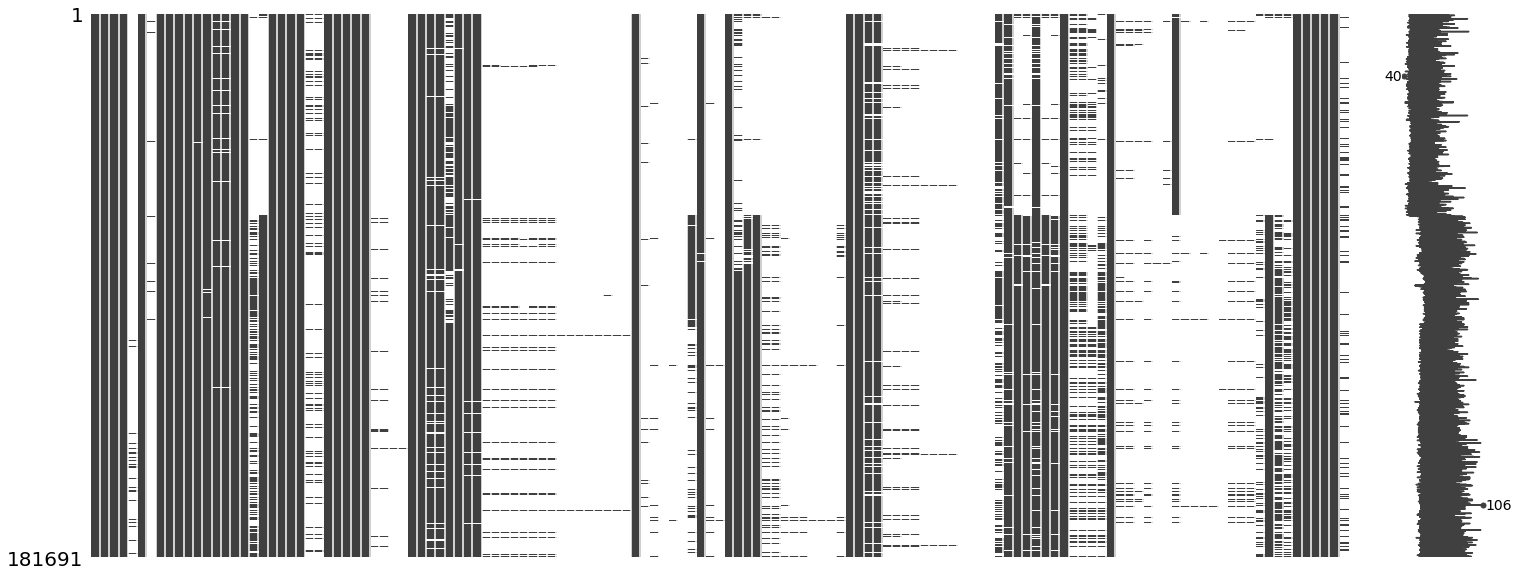

In [12]:
#Visualize missing data
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [13]:
#get a numerical value of missing data
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [16]:
missing_percent=get_numerical_summary(df)

approxdate : 172452 (94.915%)
resolution : 179471 (98.778%)
provstate : 421 (0.232%)
city : 434 (0.239%)
latitude : 4556 (2.508%)
longitude : 4557 (2.508%)
specificity : 6 (0.003%)
location : 126196 (69.456%)
summary : 66129 (36.396%)
doubtterr : 1 (0.001%)
alternative : 152680 (84.033%)
alternative_txt : 152680 (84.033%)
multiple : 1 (0.001%)
attacktype2 : 175377 (96.525%)
attacktype2_txt : 175377 (96.525%)
attacktype3 : 181263 (99.764%)
attacktype3_txt : 181263 (99.764%)
targsubtype1 : 10373 (5.709%)
targsubtype1_txt : 10373 (5.709%)
corp1 : 42550 (23.419%)
target1 : 636 (0.35%)
natlty1 : 1559 (0.858%)
natlty1_txt : 1559 (0.858%)
targtype2 : 170547 (93.867%)
targtype2_txt : 170547 (93.867%)
targsubtype2 : 171006 (94.119%)
targsubtype2_txt : 171006 (94.119%)
corp2 : 171574 (94.432%)
target2 : 170671 (93.935%)
natlty2 : 170863 (94.04%)
natlty2_txt : 170863 (94.04%)
targtype3 : 180515 (99.353%)
targtype3_txt : 180515 (99.353%)
targsubtype3 : 180594 (99.396%)
targsubtype3_txt : 180594 (9

In [18]:
# Threshold to remove attribute having missing values greater than threshold
ATTRIBUTE_THRESHOLD = 25 #25% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df.drop(col, axis = 1, inplace = True)


In [20]:
_ = get_numerical_summary(df)

provstate : 421 (0.232%)
city : 434 (0.239%)
latitude : 4556 (2.508%)
longitude : 4557 (2.508%)
specificity : 6 (0.003%)
doubtterr : 1 (0.001%)
multiple : 1 (0.001%)
targsubtype1 : 10373 (5.709%)
targsubtype1_txt : 10373 (5.709%)
corp1 : 42550 (23.419%)
target1 : 636 (0.35%)
natlty1 : 1559 (0.858%)
natlty1_txt : 1559 (0.858%)
guncertain1 : 380 (0.209%)
weapsubtype1 : 20768 (11.43%)
weapsubtype1_txt : 20768 (11.43%)
nkill : 10313 (5.676%)
nwound : 16311 (8.977%)
ishostkid : 178 (0.098%)


In [21]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [23]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

Question 1- Where are the countries most targeted by terrorism?

In [46]:

# Group the data by country and count the number of terrorist attacks in each country
#country_counts = df.groupby("country_txt")["eventid"].count()

# Find the country with the most terrorist attacks
most_affected_country = country_counts.idxmax()

# Print the result
print(f"The most affected country is {most_affected_country}")



# Count the number of terrorist attacks for each country
country_counts = df['country_txt'].value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(country_counts.reset_index(), x='index', y='country_txt', 
             labels={'index':'Country','country_txt':'Terrorist Attacks'},
             title='Terrorist Attack Counts by Country')
#fig.show()
fig.update_layout(title_text='Terrorist Attacks by Country')


The most affected country is Iraq
